In [1]:
import numpy as np 
import pandas as pd 
import mglearn 
import matplotlib.pyplot as plt
%matplotlib inline

# Types of Data Represented as Strings

There are four kinds of string data you might see: 
1) Categorical data

2) Free strings that can be semantically mapped to categories

3) Structured string data

4) Text Data

# Sentiment Analysis of Movie Reviews

In [2]:
from sklearn.datasets import load_files 

reviews_train=load_files("aclImdb/train/")
# load_files returns a bunch, containing training texts and training labels
text_train,y_train=reviews_train.data,reviews_train.target
print('type of text_train:{}'.format(type(text_train)))
print('length of text_train:{}'.format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of text_train:<class 'list'>
length of text_train:25000
text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision"

In [3]:
text_train=[doc.replace(b"<br /",b" ") for doc in text_train]

In [4]:
print("Samples per class (training): {}".format(np.bincount(y_train)))

Samples per class (training): [12500 12500]


In [5]:
reviews_test=load_files("aclImdb/test/")
# load_files returns a bunch, containing training texts and training labels
text_test,y_test=reviews_test.data,reviews_test.target
print('type of text_test:{}'.format(type(text_test)))
print('length of text_test:{}'.format(len(text_test)))
text_test=[doc.replace(b"<br /",b" ") for doc in text_test]

type of text_test:<class 'list'>
length of text_test:25000


In [6]:
print("Samples per class (testing): {}".format(np.bincount(y_test)))

Samples per class (testing): [12500 12500]


# Representing Text Data as a Bag of Words

## Applying bad of word toa toy dataset

In [7]:
bards_words=['The fool doth think he is wise,','but the wise man knows himself to be a fool']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
vect.fit(bards_words)

CountVectorizer()

In [9]:
print("Vocabulary Size: {}".format(len(vect.vocabulary_)))
print("Vocabulary content:\n {}".format(vect.vocabulary_))

Vocabulary Size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [10]:
bag_of_words=vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [11]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()))

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


## Bag of words for Movie Reviews

In [12]:
vect=CountVectorizer().fit(text_train)
X_train=vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [13]:
feature__names=vect.get_feature_names()
print("Number of features: {}".format(len(feature__names)))
print("First 20 features: \n{}".format(feature__names[:20]))
print("Features 20010 to 20030:\n{}".format(feature__names[20010:20030]))

Number of features: 74849
First 20 features: 
['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02']
Features 20010 to 20030:
['dratted', 'draub', 'draught', 'draughts', 'draughtswoman', 'draw', 'drawback', 'drawbacks', 'drawer', 'drawers', 'drawing', 'drawings', 'drawl', 'drawled', 'drawling', 'drawn', 'draws', 'draza', 'dre', 'drea']


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores=cross_val_score(LogisticRegression(),X_train,y_train,cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.88


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best Parameters: ",grid.best_params_)

Best cross-validation score: 0.89
Best Parameters:  {'C': 0.1}


In [16]:
X_test=vect.transform(text_test)
print("{:.2f}".format(grid.score(X_test,y_test)))

0.88


In [17]:
vect=CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


In [18]:
feature__names=vect.get_feature_names()
print("First 50 features:\n{}".format(feature__names[:50]))
print("Feature 20010 to 20030:\n{}".format(feature__names[20010:20030]))
print("Every 700th feature:\n{}".format(feature__names[::700]))

First 50 features:
['00', '000', '007', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '108', '10s', '10th', '11', '110', '112', '116', '117', '11th', '12', '120', '12th', '13', '135', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '1600', '16mm', '16s', '16th']
Feature 20010 to 20030:
['repentance', 'repercussions', 'repertoire', 'repetition', 'repetitions', 'repetitious', 'repetitive', 'rephrase', 'replace', 'replaced', 'replacement', 'replaces', 'replacing', 'replay', 'replayable', 'replayed', 'replaying', 'replays', 'replete', 'replica']
Every 700th feature:
['00', 'affections', 'appropriately', 'barbra', 'blurbs', 'butchered', 'cheese', 'commitment', 'courts', 'deconstructed', 'disgraceful', 'dvds', 'eschews', 'fell', 'freezer', 'goriest', 'hauser', 'hungary', 'insinuate', 'juggle', 'leering', 'maelstrom', 'messiah', 'music', 'occasional', 'parking', 'pleasantville', 'pronunciatio

# Stopwords


In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))


Number of stop words: 318
Every 10th stopword:
['twenty', 'amount', 'upon', 'amoungst', 'few', 'afterwards', 'empty', 'see', 'up', 'twelve', 'beyond', 'everything', 'hers', 'he', 'if', 'where', 'ours', 'several', 'seems', 'mine', 'name', 'then', 'formerly', 'do', 'wherein', 'more', 'out', 'not', 'thru', 'thereby', 'cry', 'yourselves']


In [20]:
# specifying stop_words="english" uses the built-in list.
# We could also augment it and pass our own.bag_of_words
vect=CountVectorizer(min_df=5,stop_words="english").fit(text_train)
X_train=vect.transform(text_train)
print("X_train with stopwords: {}".format(repr(X_train)))

X_train with stopwords: <25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


In [21]:
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.88


# Rescaling the Data with tf-idf

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe=make_pipeline(TfidfVectorizer(min_df=5,norm=None),LogisticRegression())
param_grid={'logisticregression__C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.89


In [23]:
vectorizer=grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train=vectorizer.transform(text_train)
#find maximum value for each of the features over the dataset
max_value=X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf=max_value.argsort()
#get feature names
feature__names=np.array(vectorizer.get_feature_names())
print("Features with lowest tfidf:\n{}".format(feature__names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf:\n{}".format(feature__names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']
Features with highest tfidf:
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']


In [24]:
sorted_by_idf=np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature__names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


In [25]:
# Investigating Model Coefficients


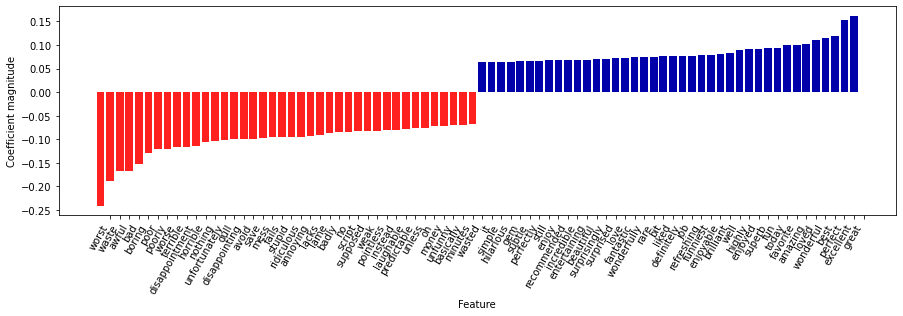

In [26]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"].coef_,feature__names,n_top_features=40)

# Bag-of-Words with More Than One Word (n-Grams)

In [27]:
print("bard_word:\n{}".format(bards_words))

bard_word:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [28]:
cv=CountVectorizer(ngram_range=(1,1)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:13
Vocabulary:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [29]:
cv=CountVectorizer(ngram_range=(2,2)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:14
Vocabulary:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [30]:
print("transformed data (dense):\n{}".format(cv.transform(bards_words).toarray()))

transformed data (dense):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [31]:
cv=CountVectorizer(ngram_range=(1,3)).fit(bards_words)
print("Vocabulary size:{}".format(len(cv.vocabulary_)))
print("Vocabulary:\n{}".format(cv.get_feature_names()))

Vocabulary size:39
Vocabulary:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [32]:
pipe=make_pipeline(TfidfVectorizer(min_df=5),LogisticRegression())
# runnig the grid search takes a long time because of the
# relatively large grid and the inclusion of trigrams
param_grid={'logisticregression__C':[0.001,0.01,0.1,1,10,100],
"tfidfvectorizer__ngram_range":[(1,1),(1,2),(1,3)]}

grid=GridSearchCV(pipe,param_grid,cv=5)
grid.fit(text_train,y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))

Best cross-validation score: 0.91
Best parameters:
{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}


In [33]:
y_pred=grid.predict(text_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[11299  1201]
 [ 1248 11252]]
0.90204


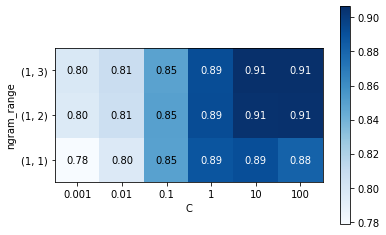

In [35]:
# extracr scores from grid_search
scores=grid.cv_results_['mean_test_score'].reshape(-1,3).T 
#visulize heat map
heatmap=mglearn.tools.heatmap(scores,xlabel="C",ylabel='ngram_range',cmap='Blues',fmt='%.2f',xticklabels=param_grid['logisticregression__C'],yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

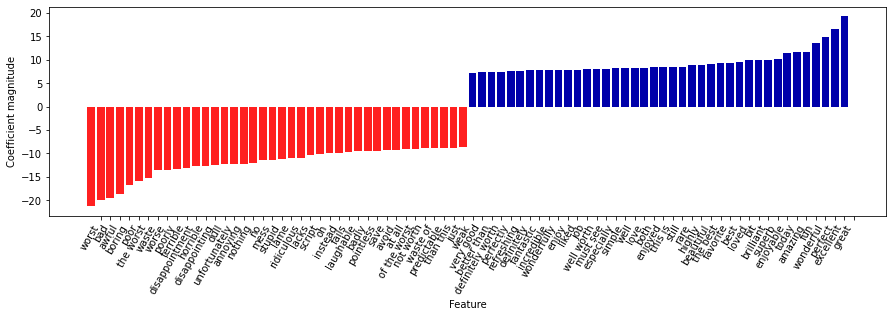

In [36]:
# extract feature names and coefficients
vect=grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names=np.array(vect.get_feature_names())
coef=grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names,n_top_features=40)

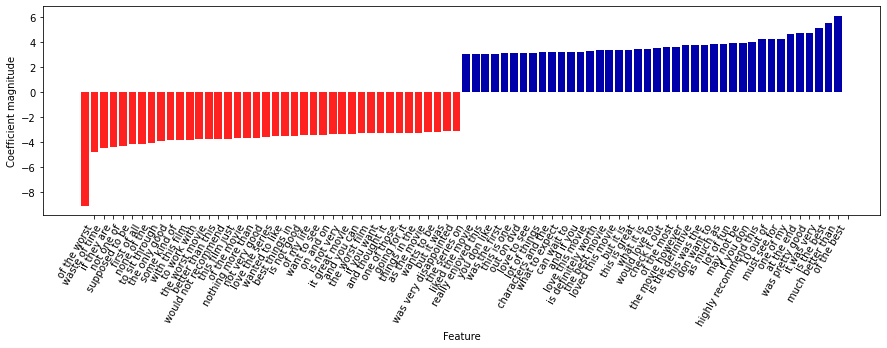

In [37]:
# find 3-gram features
mask=np.array([len(feature.split(" ")) for feature in feature_names])==3
# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask],feature_names[mask],n_top_features=40)

# Advanced tokenization, Stemming, and Lemmatization

In [42]:
import spacy
import nltk 

# load spacy's English-language models
en_nlp=spacy.load('en')
#instantiate nltk's Porter Stemmer 
stemmer=nltk.stem.PorterStemmer()

def compare_normalization(doc):
    #tokenize document in spacy
    doc_spacy=en_nlp(doc)
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy])
    print("Stemming")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [43]:
compare_normalization(u"Our meeting today was worse than yesterday,"
"I'm scared of meeting the clients tommorow")

Lemmatization:
['-PRON-', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', "I'm", 'scare', 'of', 'meet', 'the', 'client', 'tommorow']
Stemming
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', "i'm", 'scare', 'of', 'meet', 'the', 'client', 'tommorow']


In [54]:
# Technicality: we want to use the regexp-based tokenizer
# that is used by CountVectorizer and only use the lemmatization
# from spacy. To this end, we replace en_nlp.tokenizer (the spacy tokenizer)
# with the regexp-based tokenization.
import re
# regexp used in CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')
# load spacy language model and save old tokenizer
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# replace the tokenizer with the preceding regexp
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
regexp.findall(string))
# create a custom tokenizer using the spacy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy]
# define a count vectorizer with the custom tokenizer
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)


In [55]:
# transform text_train using CountVectorizer with lemmatization
X_train_lemma=lemma_vect.fit_transform(text_train)

print("X_train.lemma.shape:{}".format(X_train_lemma.shape))

# standard CountVectorizer for reference
vect=CountVectorizer(min_df=5).fit(text_train)
X_train=vect.transform(text_train)
print("X_train.shape:{}".format(X_train.shape))

X_train.lemma.shape:(25000, 21825)
X_train.shape:(25000, 27271)


In [62]:
# build a grid search using only 1% of the data as the training set
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit( test_size=0.99,
train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# perform grid search with standard CountVectorizer
grid.fit(X_train, y_train)
print("Best cross-validation score "
"(standard CountVectorizer): {:.3f}".format(grid.best_score_))
# perform grid search with lemmatization
grid.fit(X_train_lemma, y_train)
print("Best cross-validation score "
"(lemmatization): {:.3f}".format(grid.best_score_))

Best cross-validation score (standard CountVectorizer): 0.719
Best cross-validation score (lemmatization): 0.730


# Topic Modeling and Document Clustering

## Latent Dirichlet Allocation

In [63]:
vect=CountVectorizer(max_features=10000,max_df=.15)
X=vect.fit_transform(text_train)

In [66]:
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=10,learning_method='batch',max_iter=25, random_state=0)
document_topics=lda.fit_transform(X)

In [67]:
lda.components_.shape

(10, 10000)

In [68]:
# For each topic (a row in the components_), sort the features (ascending)
# Invert rows with [:,::-1] to make descending 
sorting=np.argsort(lda.components_,axis=1)[:,::-1]
# get the feature names from vectorizer
feature_names=np.array(vect.get_feature_names())

In [69]:
# print out the 10 topics:
mglearn.tools.print_topics(topics=range(20),feature_names=feature_names,sorting=sorting,topics_per_chunk=5,n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
between       war           funny         show          didn          
young         world         worst         series        saw           
family        us            comedy        episode       am            
real          our           thing         tv            thought       
performance   american      guy           episodes      years         
beautiful     documentary   re            shows         book          
work          history       stupid        season        watched       
each          new           actually      new           now           
both          own           nothing       television    dvd           
director      point         want          years         got           


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
horr

In [70]:
lda100=LatentDirichletAllocation(n_components=100,learning_method='batch',max_iter=25, random_state=0)
document_topics100=lda100.fit_transform(X)

In [73]:
# sort by weight of "music" topic 45
music=np.argsort(document_topics100[:,45])[::-1]
# print the five documents where the topic is most importaant
for i in music[:10]:
    # pshow first two sentences
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

b'I love this movie and never get tired of watching. The music in it is great.\n'
b"I enjoyed Still Crazy more than any film I have seen in years. A successful band from the 70's decide to give it another try.\n"
b'Hollywood Hotel was the last movie musical that Busby Berkeley directed for Warner Bros. His directing style had changed or evolved to the point that this film does not contain his signature overhead shots or huge production numbers with thousands of extras.\n'
b"What happens to washed up rock-n-roll stars in the late 1990's? They launch a comeback / reunion tour. At least, that's what the members of Strange Fruit, a (fictional) 70's stadium rock group do.\n"
b'As a big-time Prince fan of the last three to four years, I really can\'t believe I\'ve only just got round to watching "Purple Rain". The brand new 2-disc anniversary Special Edition led me to buy it.\n'
b"This film is worth seeing alone for Jared Harris' outstanding portrayal of John Lennon. It doesn't matter that H